**Introduction to the Perceptron Algorithm**

The Perceptron is one of the earliest and most influential algorithms in machine learning.
Given data points $(x_i, y_i)$ with

$x_i \in \mathbb{R}^d, \qquad y_i \in \{-1,+1\}$,

the perceptron tries to find a linear classifier of the form

$\hat{y} = \operatorname{sign}(w^\top x + b)$,

where $w \in \mathbb{R}^d$ is a weight vector and $b$ is a bias term.

The perceptron assumes that the dataset is ``linearly separable``, i.e., there exists a hyperplane that perfectly separates the positive and negative samples.


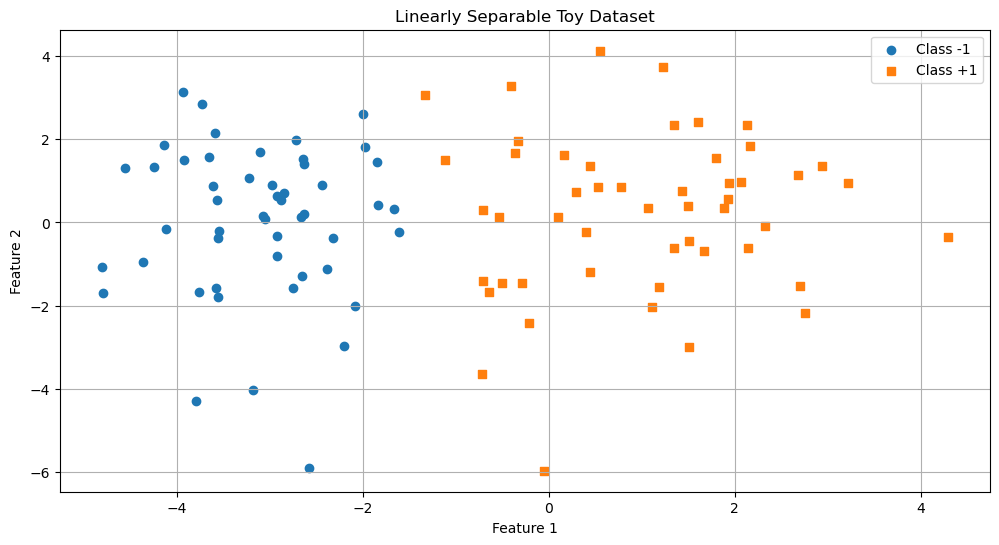

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import matplotlib.animation as animation

# 1. Generate base dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10
)

# Convert labels from {0, 1} to {-1, +1}
y_perc = np.where(y == 0, -1, 1)

# 2. Increase variance by scaling features
variance_scale = 2.0
X = X * variance_scale

# 3. Plot dataset
plt.figure(figsize=(12, 6))
plt.scatter(X[y_perc == -1, 0], X[y_perc == -1, 1], marker='o', label='Class -1')
plt.scatter(X[y_perc ==  1, 0], X[y_perc ==  1, 1], marker='s', label='Class +1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Linearly Separable Toy Dataset')
plt.grid(True)
plt.savefig("D:\Important Subjects\Machine Learning\Project\Report\Media")
plt.show()


**Geometric Interpretation**

A linear classifier defines a hyperplane:
\$
w^\top x + b = 0.
\$

Points are classified as:
\$
\text{Positive } (+1) \quad \text{if } w^\top x + b > 0,
\$
\$
\text{Negative } (-1) \quad \text{if } w^\top x + b < 0.
\$

The vector $w$ is perpendicular to the hyperplane and determines its orientation.  
The magnitude $\|w\|$ affects the margin, or how ``thick'' the decision boundary is.


**The Perceptron Learning Rule**

The perceptron proceeds in rounds. For each data point $(x_i, y_i)$, it predicts
$
\hat{y}_i = \operatorname{sign}(w^\top x_i + b).
$

**Update Rule**

If the sample is correctly classified, no update is performed.  
If it is misclassified, i.e.,
$[
y_i \,(w^\top x_i + b) \le 0,
]$
then the algorithm updates the parameters as follows:
$[
w \leftarrow w + \eta\, y_i x_i, \qquad
b \leftarrow b + \eta\, y_i,
]$
where $\eta > 0$ is the learning rate (typically $\eta = 1$)

**Intuition**

* If a positive point is misclassified as negative, the algorithm pushes the hyperplane ``towards`` that point.
* If a negative point is misclassified as positive, it pushes the hyperplane ``away`` from that point.

This update rule is fully online and remarkably simple.


In [5]:
def plot_decision_boundary(X, y, w, b, title="Decision Boundary"):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label='Class -1')
    plt.scatter(X[y ==  1, 0], X[y ==  1, 1], marker='s', label='Class +1')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xs = np.linspace(x_min, x_max, 200)

    if abs(w[1]) > 1e-12:
        ys = -(w[0] * xs + b) / w[1]
        plt.plot(xs, ys, linestyle='-', label='Decision boundary')
    else:
        x_line = -b / (w[0] + 1e-12)
        plt.axvline(x_line, linestyle='-', label='Decision boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


In [6]:
import os
def plot_decision_boundary_save(X, y, w, b, title, filename):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label='Class -1')
    plt.scatter(X[y ==  1, 0], X[y ==  1, 1], marker='s', label='Class +1')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xs = np.linspace(x_min, x_max, 200)

    if abs(w[1]) > 1e-12:
        ys = -(w[0] * xs + b) / w[1]
        plt.plot(xs, ys, linestyle='-', label='Decision boundary')
    else:
        x_line = -b / (w[0] + 1e-12)
        plt.axvline(x_line, linestyle='-', label='Decision boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    
    plt.savefig(os.path.join("D:\Important Subjects\Machine Learning\Project\Report\Media\Convergence plots", filename), dpi=300, bbox_inches='tight')
    plt.close()

Perceptron converged in epoch 4
Final weights: [7.09703775 0.62987918]
Final bias: 9.0


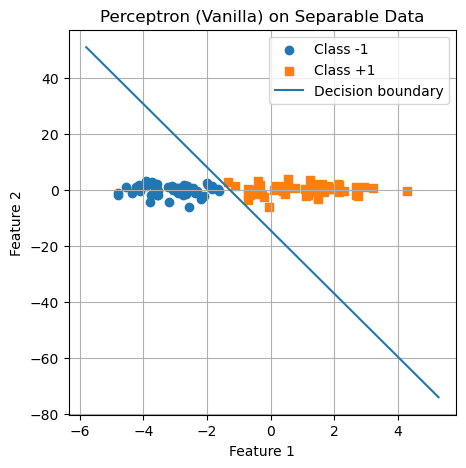

In [39]:
def perceptron_train(X, y, lr=1.0, max_epochs=1000):
    """
    Standard perceptron with explicit bias.
    X: (n_samples, n_features)
    y: labels in {-1, +1}
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0
    history = []  # store (w, b) after each update
    count = 0
    for epoch in range(max_epochs):
        errors = 0
        for i in range(n_samples):
            activation = np.dot(w, X[i]) + b
            y_pred = 1 if activation >= 0 else -1
            if y_pred != y[i]:
                w += lr * y[i] * X[i]
                b += lr * y[i]
                errors += 1
                history.append((w.copy(), b)) 
                plot_decision_boundary_save(X, y, w, b,f"Decision Boundary at update {count}",f"boundary_update_{count}.png")
                count+=1
        if errors == 0:
            print(f"Perceptron converged in epoch {epoch + 1}")
            break

    return w, b, history

w, b, history = perceptron_train(X, y_perc, lr=1.0, max_epochs=1000)
print("Final weights:", w)
print("Final bias:", b)

plot_decision_boundary(X, y_perc, w, b,
                       "Perceptron (Vanilla) on Separable Data")


**The Perceptron Trick (Augmented Feature Representation)**

To simplify notation, we introduce an augmented feature vector:
$
\tilde{x}_i =
\begin{bmatrix}
1 \\
x_i
\end{bmatrix},
\qquad
\tilde{w}=
\begin{bmatrix}
b \\
w
\end{bmatrix}.
$

Then the prediction becomes:
\$
\hat{y}_i = \operatorname{sign}(\tilde{w}^\top \tilde{x}_i),
$

and the update rule becomes:
\$
\tilde{w} \leftarrow \tilde{w} + y_i \tilde{x}_i.
\$

The bias term is now incorporated as an additional dimension in the weight vector.  
This trick simplifies theory, implementation, and proofs.


(Trick) converged in epoch 4
Augmented weight vector: [9.         7.09703775 0.62987918]


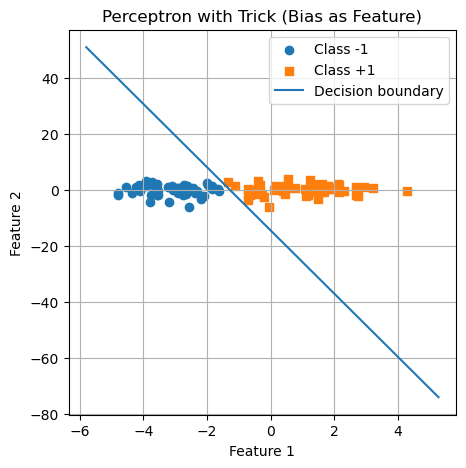

In [9]:
def add_bias_feature(X):
    n_samples = X.shape[0]
    ones = np.ones((n_samples, 1))
    X_tilde = np.hstack([ones, X])  # shape: (n_samples, 1 + n_features)
    return X_tilde

X_tilde = add_bias_feature(X)

def perceptron_with_trick(X_tilde, y, lr=1.0, max_epochs=1000):
    n_samples, n_features = X_tilde.shape
    w_tilde = np.zeros(n_features)

    for epoch in range(max_epochs):
        errors = 0
        for i in range(n_samples):
            activation = np.dot(w_tilde, X_tilde[i])
            y_pred = 1 if activation >= 0 else -1
            if y_pred != y[i]:
                w_tilde += lr * y[i] * X_tilde[i]
                errors += 1
        if errors == 0:
            print(f"(Trick) converged in epoch {epoch + 1}")
            break

    return w_tilde

w_tilde = perceptron_with_trick(X_tilde, y_perc, lr=1.0, max_epochs=1000)
print("Augmented weight vector:", w_tilde)

b_trick = w_tilde[0]
w_trick = w_tilde[1:]

plot_decision_boundary(X, y_perc, w_trick, b_trick,
                       "Perceptron with Trick (Bias as Feature)")


**The Hinge Loss and the Perceptron**

The perceptron update rule can be understood through the hinge loss, defined as
$
\ell_i(w,b) = \max\bigl(0,\, 1 - y_i (w^\top x_i + b)\bigr).
$

**Interpretation**

* If a point is correctly classified with margin $\ge 1$, the hinge loss is $0$.
* If it is too close to the boundary or misclassified, the loss is positive.

The subgradient of the hinge loss with respect to $w$ is

$\nabla_w \ell_i$=
\begin{cases}
0, & \text{if } y_i (w^\top x_i + b) \ge 1, \\
- y_i x_i, & \text{if } y_i (w^\top x_i + b) < 1.
\end{cases}


Stochastic gradient descent (SGD) on the hinge loss performs the update
$
w \leftarrow w + \eta\, y_i x_i \quad \text{if margin } < 1.
$

This is nearly identical to the perceptron update, except:

* Perceptron updates when margin $\le 0$.
* Hinge-loss SGD updates when margin $< 1$.

Thus, the hinge-loss version encourages larger margins, similar to a soft-margin SVM.


Epoch   0 - average hinge loss: 0.3448
Epoch  20 - average hinge loss: 0.0477
Epoch  40 - average hinge loss: 0.0320
Epoch  60 - average hinge loss: 0.0267
Epoch  80 - average hinge loss: 0.0245
Epoch 100 - average hinge loss: 0.0224
Epoch 120 - average hinge loss: 0.0202
Epoch 140 - average hinge loss: 0.0181
Epoch 160 - average hinge loss: 0.0156
Epoch 180 - average hinge loss: 0.0137


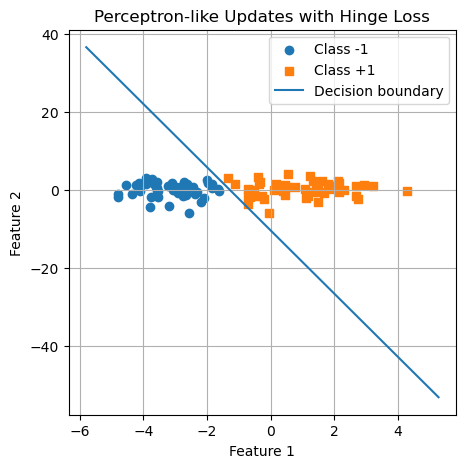

In [11]:
def hinge_perceptron(X, y, lr=0.01, max_epochs=200):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0.0

    def hinge_loss(X, y, w, b):
        margins = 1 - y * (X @ w + b)
        return np.mean(np.maximum(0, margins))

    for epoch in range(max_epochs):
        total_loss = 0.0
        for i in range(n_samples):
            margin = y[i] * (np.dot(w, X[i]) + b)
            loss_i = max(0, 1 - margin)
            total_loss += loss_i

            if margin < 1:
                # Gradient step on hinge loss (no regularization)
                w += lr * y[i] * X[i]
                b += lr * y[i]

        avg_loss = total_loss / n_samples
        if epoch % 20 == 0:
            print(f"Epoch {epoch:3d} - average hinge loss: {avg_loss:.4f}")

    return w, b

w_hinge, b_hinge = hinge_perceptron(X, y_perc, lr=0.01, max_epochs=200)

plot_decision_boundary(X, y_perc, w_hinge, b_hinge,
                       "Perceptron-like Updates with Hinge Loss")


**Margin and Separability**

A dataset is linearly separable if there exists $(w^*, b^*)$ such that
$
y_i \bigl( {w^*}^\top x_i + b^* \bigr) > 0 \quad \forall i.
$

If we rescale so that $\|w^*\| = 1$, then the ``geometric margin`` is defined as
$
\gamma = \min_i \; y_i \bigl( {w^*}^\top x_i + b^* \bigr).
$

* A larger $\gamma$ means the classes are easier to separate.  
* A smaller $\gamma$ means the two classes nearly touch.

We also define the ``radius`` of the dataset as
$
R = \max_i \|x_i\|.
$

This radius is influenced by the variance or scaling of the features; increasing feature magnitudes increases $R$.


**The Perceptron Convergence Theorem**

**Theorem (Novikoff, 1962).**  
If the dataset is linearly separable with margin $\gamma > 0$ and
$
\|x_i\| \le R \quad \text{for all } i,
$
then the perceptron makes at most
$
T \le \left( \frac{R}{\gamma} \right)^2
$
updates before converging.

**Key Takeaways**

* Convergence is guaranteed for linearly separable data.
* The mistake bound depends only on the geometry of the dataset.
* In practice, the actual number of updates is usually far smaller than the theoretical worst-case bound.


**Proof of the Perceptron Convergence Theorem**

**Step 1: The Perceptron Vector Makes Progress Toward the Optimal Separator**

Assume the perceptron makes an update on $(x_i, y_i)$:
$w^{(t+1)} = w^{(t)} + y_i x_i$
.

Take the dot product with the optimal weight vector $w^*$ (where $\|w^*| = 1$):
$
w^{(t+1)} \cdot w^* = w^{(t)} \cdot w^* + y_i (x_i \cdot w^*).
$

Since the margin is at least $\gamma$, we have
$
y_i (x_i \cdot w^*) \ge \gamma.
$

Thus,
$
w*{(t+1)} \cdot w^* \ge w^{(t)} \cdot w^* + \gamma.
$

By induction, after $T$ updates:
$
w^{(T)} \cdot w^* \ge T \gamma.
$


**Step 2: The Norm of the Perceptron Vector Cannot Grow Too Quickly**

We compute:
$
\|w^{(t+1)}\|^2
= \|\, w^{(t)} + y_i x_i \,\|^2
= \|w^{(t)}\|^2 + \|x_i\|^2 + 2 y_i \bigl( w^{(t)} \cdot x_i \bigr).
$

Since the point is misclassified:
$
y_i \bigl( w^{(t)} \cdot x_i \bigr) \le 0.
$

Thus,
$
\|w^{(t+1)}\|^2 \le \|w^{(t)}\|^2 + R^2.
$

Starting with $w^{(0)} = 0$, we obtain:
$
\|w^{(T)}\|^2 \le T R^2.
$


**Step 3: Combine Both Inequalities**

From Step 1:
$
w^{(T)} \cdot w^* \ge T \gamma.
$

But by Cauchy--Schwarz:
$
w^{(T)} \cdot w^* \le \|w^{(T)}\| \, \|w^*\| = \|w^{(T)}\|,
$
since $\|w^*\| = 1$.

So we obtain:
$
T \gamma \le \|w^{(T)}\|.
$

Square both sides:
$
T^2 \gamma^2 \le \|w^{(T)}\|^2.
$

From Step 2 we have:
$
\|w^{(T)}\|^2 \le T R^2.
$

Combining:
$
T^2 \gamma^2 \le T R^2.
$

Divide both sides by $T \gamma^2$:
$
T \le \frac{R^2}{\gamma^2}.
$

This completes the proof of the perceptron convergence theorem.


**Empirical Verification in Our Notebook**

We can compute the radius of the dataset:
$
R = \max_i \|x_i\|.
$

We also estimate the margin:
$
\hat{\gamma} = \min_i \frac{y_i \bigl( w^\top x_i + b \bigr)}{\|w\|}.
$

Then we compare:
* The actual number of updates performed by our perceptron.
* The theoretical upper bound $\left( \frac{R}{\hat{\gamma}} \right)^2$.

Typically:
* The actual number of updates is small (tens or hundreds).
* The theoretical bound is extremely loose (often thousands or millions).

This confirms the theory while also illustrating its conservativeness.


In [18]:
# Radius R: max norm of samples
R = np.max(np.linalg.norm(X, axis=1))
print("R (max norm of samples):", R)

def estimated_margin(X, y, w, b):
    w_norm = np.linalg.norm(w)
    margins = y * (X @ w + b) / (w_norm + 1e-12)
    return np.min(margins)

gamma_hat = estimated_margin(X, y_perc, w, b)  # using vanilla perceptron solution
print("Estimated margin gamma_hat:", gamma_hat)

bound = (R / (gamma_hat + 1e-12)) ** 2
print("Approx. theoretical upper bound on #updates:", bound)
print("Actual #updates until convergence:", len(history))


R (max norm of samples): 6.4447513916413
Estimated margin gamma_hat: 0.21006936522129688
Approx. theoretical upper bound on #updates: 941.2107779492442
Actual #updates until convergence: 21


**Interpreting the Numerical Bound vs. Actual Updates**

The code cell above reports:

* $R$: the maximum Euclidean norm of any training sample, i.e., the *radius* of the dataset.
* $\hat{\gamma}$: an empirical estimate of the geometric margin obtained from the final perceptron solution $(w, b)$.
* $\left( \tfrac{R}{\hat{\gamma}} \right)^2$: the corresponding theoretical upper bound on the number of perceptron mistakes.
* `len(history)`: the actual number of updates until convergence on this dataset.

In our runs, we have observe that

* the **actual** number of updates is typically quite modest, while
        the **bound** $\left( \tfrac{R}{\hat{\gamma}} \right)^2$ can be much larger;
* this illustrates that the perceptron convergence theorem provides a
        **worst-case guarantee**, not a tight prediction for typical datasets.

From a theoretical perspective, this is very common: bounds are designed to
hold in *all* separable cases, including highly adversarial geometries, so
they tend to be conservative compared to what we see in practice on
well-behaved synthetic or real datasets.


**Non-Separable Data: Why the Perceptron Fails**

If the data is not linearly separable, then
$
\exists\, i :\; y_i \bigl( w^\top x_i + b \bigr) < 0 \quad \forall (w,b).
$

In this case:
* Misclassified points never disappear.
* Updates continue indefinitely.
* The weight vector oscillates.
* No convergence occurs.

This is a fundamental limitation of the perceptron algorithm.

Modern algorithms such as:
* Logistic Regression,
* Support Vector Machines (SVM),
* Neural Networks,
handle non-separable data using soft margins, regularization, or probabilistic modeling.


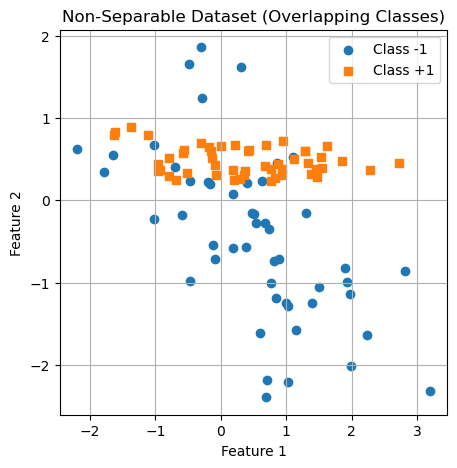

Number of updates on non-separable data: 1416


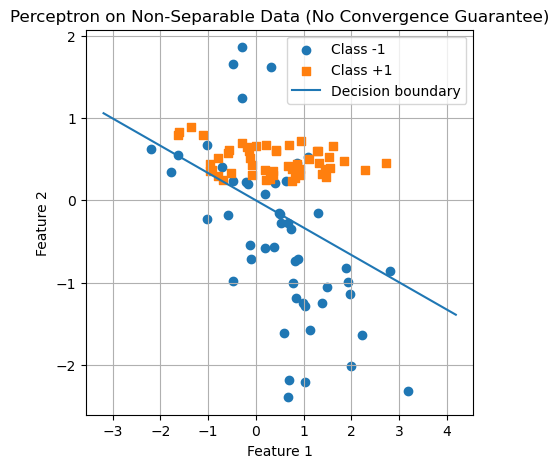

In [21]:
# Create non-separable data
X_bad, y_bad = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=0.5,
    random_state=0
)

y_bad_perc = np.where(y_bad == 0, -1, 1)

plt.figure(figsize=(5, 5))
plt.scatter(X_bad[y_bad_perc == -1, 0], X_bad[y_bad_perc == -1, 1], marker='o', label='Class -1')
plt.scatter(X_bad[y_bad_perc ==  1, 0], X_bad[y_bad_perc ==  1, 1], marker='s', label='Class +1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Non-Separable Dataset (Overlapping Classes)")
plt.grid(True)
plt.savefig("D:\Important Subjects\Machine Learning\Project\Report\Media")
plt.show()

# Train perceptron (limited epochs, likely no convergence)
w_bad, b_bad, history_bad = perceptron_train(X_bad, y_bad_perc, lr=1.0, max_epochs=50)
print("Number of updates on non-separable data:", len(history_bad))

plot_decision_boundary(X_bad, y_bad_perc, w_bad, b_bad,
                       "Perceptron on Non-Separable Data (No Convergence Guarantee)")

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

rc('animation', html='jshtml')


**Animation of Perceptron Learning**

Animating the evolution of the decision boundary helps illustrate how the perceptron learns:

* Early updates produce large changes to the decision boundary.
* Later updates make smaller, fine-grained adjustments.
* Eventually, no misclassifications remain (if the data is linearly separable).

This visualization makes the perceptron convergence theorem more intuitive.


Perceptron converged in epoch 4
Number of updates recorded for animation: 21


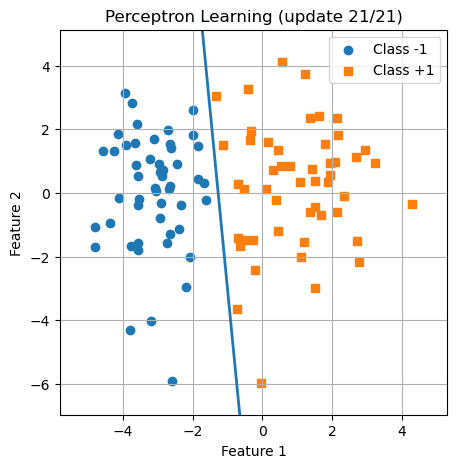

In [24]:
# Train perceptron and collect history for animation
w_anim, b_anim, history_anim = perceptron_train(X, y_perc, lr=1.0, max_epochs=1000)
print("Number of updates recorded for animation:", len(history_anim))

if len(history_anim) <= 1:
    print("Warning: history has", len(history_anim),
          "update(s) -> animation will look static (no movement).")

fig, ax = plt.subplots(figsize=(5, 5))

# Scatter plot of the data
ax.scatter(X[y_perc == -1, 0], X[y_perc == -1, 1], marker='o', label='Class -1')
ax.scatter(X[y_perc ==  1, 0], X[y_perc ==  1, 1], marker='s', label='Class +1')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Perceptron Learning Animation')
ax.legend()
ax.grid(True)

xs = np.linspace(x_min, x_max, 200)
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def update(frame_idx):
    w_frame, b_frame = history_anim[frame_idx]

    # Handle normal vs (almost) vertical line
    if abs(w_frame[1]) > 1e-12:
        ys = -(w_frame[0] * xs + b_frame) / w_frame[1]
        line.set_data(xs, ys)
    else:
        x_line = -b_frame / (w_frame[0] + 1e-12)
        xs_vert = np.full_like(xs, x_line)
        line.set_data(xs_vert, xs)

    ax.set_title(f"Perceptron Learning (update {frame_idx+1}/{len(history_anim)})")
    return line,

ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(history_anim),
    init_func=init,
    blit=True,
    interval=200
)

HTML(ani.to_jshtml())
